In [ ]:
# Emilie Helen Wolf
# January 20, 2022

# This notebook demonstrates my knowledge in classification models, hyperparameter tuning, handling 
# imbalanced data, EDA, model evaluation and comparison, performance metrics, important features, and pipelines

# ReneWind

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 40000 observations in the training set and 10000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generator could be repaired before failing/breaking to reduce the maintenance cost. The different costs associated with maintenance are as follows:

- `Replacement cost = $40,000`
- `Repair cost = $15,000`
- `Inspection cost = $5,000`

“1” in the target variables should be considered as “failure” and “0” will represent “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing libraries

In [75]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To be used for tuning the model
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines
from sklearn.pipeline import Pipeline

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Loading Data

In [176]:
# import the train and test sets as pandas dataframes, then join vertically

train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

df = pd.concat([train, test], axis=0)

<IPython.core.display.Javascript object>

In [177]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      39954 non-null  float64
 1   V2      39961 non-null  float64
 2   V3      40000 non-null  float64
 3   V4      40000 non-null  float64
 4   V5      40000 non-null  float64
 5   V6      40000 non-null  float64
 6   V7      40000 non-null  float64
 7   V8      40000 non-null  float64
 8   V9      40000 non-null  float64
 9   V10     40000 non-null  float64
 10  V11     40000 non-null  float64
 11  V12     40000 non-null  float64
 12  V13     40000 non-null  float64
 13  V14     40000 non-null  float64
 14  V15     40000 non-null  float64
 15  V16     40000 non-null  float64
 16  V17     40000 non-null  float64
 17  V18     40000 non-null  float64
 18  V19     40000 non-null  float64
 19  V20     40000 non-null  float64
 20  V21     40000 non-null  float64
 21  V22     40000 non-null  float64
 22

<IPython.core.display.Javascript object>

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      9989 non-null   float64
 1   V2      9993 non-null   float64
 2   V3      10000 non-null  float64
 3   V4      10000 non-null  float64
 4   V5      10000 non-null  float64
 5   V6      10000 non-null  float64
 6   V7      10000 non-null  float64
 7   V8      10000 non-null  float64
 8   V9      10000 non-null  float64
 9   V10     10000 non-null  float64
 10  V11     10000 non-null  float64
 11  V12     10000 non-null  float64
 12  V13     10000 non-null  float64
 13  V14     10000 non-null  float64
 14  V15     10000 non-null  float64
 15  V16     10000 non-null  float64
 16  V17     10000 non-null  float64
 17  V18     10000 non-null  float64
 18  V19     10000 non-null  float64
 19  V20     10000 non-null  float64
 20  V21     10000 non-null  float64
 21  V22     10000 non-null  float64
 22 

<IPython.core.display.Javascript object>

In [9]:
df.sample(n=15)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
32897,9.297,2.147,10.474,-2.127,-4.181,-2.719,0.345,-2.950,2.358,0.977,-2.115,1.981,5.186,-1.974,-0.865,-8.461,-4.354,-2.429,4.758,-1.445,-11.557,1.944,-6.735,-4.748,4.512,5.435,8.401,-3.708,-3.689,-4.781,3.496,-8.467,-4.382,0.574,6.726,3.287,-2.293,-2.360,1.481,-1.573,0
3544,4.433,2.016,6.168,-0.468,-1.818,-1.303,-0.003,-2.179,1.485,0.466,-0.511,0.242,3.330,-1.393,-1.151,-4.425,-3.340,-1.943,2.594,-1.804,-6.333,0.269,-4.487,-2.481,1.651,4.638,3.811,-2.541,-1.430,-2.209,2.518,-3.516,-0.678,-0.188,4.130,1.175,-1.946,-0.875,0.792,-1.526,0
26921,0.977,0.180,7.255,-0.217,-2.051,0.195,-2.423,-6.162,1.756,1.601,-2.647,-1.177,1.588,-2.840,-3.777,-10.663,-2.008,2.320,3.989,0.425,-8.176,1.113,-7.598,-0.638,1.914,2.632,2.773,-0.873,-1.200,-1.310,-0.733,-6.190,0.617,1.064,4.957,2.597,-0.955,2.529,2.812,-2.745,0
25597,-0.125,-2.075,6.608,-2.822,0.259,-4.154,-3.255,3.847,0.192,-1.597,-5.895,3.248,7.501,1.037,-6.755,-1.467,-0.683,3.126,-3.443,2.784,-7.698,0.995,1.373,-1.460,1.081,3.952,-1.474,-5.500,-2.382,0.089,6.288,3.580,-0.712,-4.800,4.191,7.607,1.371,-11.367,1.327,1.226,0
2113,2.766,1.072,1.962,-0.509,-0.858,0.630,-0.742,-3.407,1.978,-0.113,-0.843,-1.394,1.090,-1.221,-1.992,-6.133,-0.951,1.447,0.586,-1.037,-4.765,2.025,-1.753,-0.323,1.061,1.705,1.874,-0.630,-1.204,-0.979,-1.037,-2.529,0.020,-1.338,2.036,-0.442,-0.678,1.380,0.313,-0.699,0
14490,2.809,1.304,7.896,-5.099,-0.072,1.308,-0.339,-5.551,-0.982,3.698,-0.679,-0.194,1.844,-1.879,-0.765,-5.811,-7.363,1.434,1.034,-6.652,-5.465,-0.194,-7.516,-0.565,1.631,5.780,7.006,-3.498,-1.989,-4.157,6.710,-4.149,2.191,-0.990,3.141,6.762,-2.431,3.644,3.587,-0.083,0
9383,-5.365,-10.716,-4.396,-1.797,-3.130,-2.211,-2.891,2.852,-1.895,3.894,-4.003,5.587,4.089,4.279,-6.021,-2.201,0.882,5.728,2.384,8.820,-2.517,5.289,7.793,1.718,-0.300,-11.414,1.375,2.661,-4.922,2.753,-6.568,3.196,-5.375,5.353,1.105,5.919,4.089,-4.258,3.084,-5.054,0
15501,-1.530,1.473,3.530,1.117,1.063,-1.367,-0.186,-1.407,-0.646,1.394,-4.316,1.427,-0.881,-1.166,-0.304,-3.164,1.385,0.661,2.513,0.316,-1.475,-0.066,-2.307,2.741,0.977,2.198,-0.024,0.666,-3.268,-3.708,1.429,-0.857,-2.536,2.051,-0.071,3.327,-0.248,2.223,2.173,-1.234,0
25409,-0.996,-0.741,6.515,-2.263,0.112,-1.593,-0.617,-0.716,-1.870,2.434,-4.394,2.729,0.433,-0.704,0.031,-2.347,-0.867,1.363,1.743,0.448,-2.358,-0.867,-4.585,0.252,2.244,1.690,2.834,-1.149,-2.773,-3.987,4.514,-3.391,-2.648,2.107,0.775,7.685,0.284,-0.335,3.502,0.291,0
34970,-5.703,4.609,-1.866,-0.083,6.238,3.587,-1.960,-3.791,-2.277,-0.265,0.593,-1.779,-2.131,-3.244,-5.185,-2.530,-2.030,5.444,-2.898,-9.648,-0.760,0.798,2.647,11.033,-6.093,7.564,-8.470,-1.376,2.511,4.445,3.386,12.362,12.456,-7.868,2.441,-1.557,-2.142,7.815,-0.353,0.171,0


<IPython.core.display.Javascript object>

# Initial Observation

- There are 10,000 rows in the test set
- There are 40,000 rows in the train set
- All of the features are of type `float`, both positive and negative values
- The target column is of type `int`
- There appears to be missing data in the first two columns of both the Train and Test sets

## EDA

In [10]:
# Let's check for duplicate rows

df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [13]:
# Let's investigate the percentage of missing data

round(df[["V1", "V2"]].isnull().sum() / df[["V1", "V2"]].isnull().count() * 100, 2)

V1   0.110
V2   0.090
dtype: float64

<IPython.core.display.Javascript object>

In [19]:
# How many rows with missing values?

df.isnull().any(axis=1).sum()

103

<IPython.core.display.Javascript object>

In [30]:
# Are there any noticable patterns of missingness?

# subset the rows with missing values
nulls = df[df.isnull().any(axis=1)]

# Look at a sample of rows with missing data
nulls.sample(n=10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
18653,7.866,NaN,9.760,-4.866,-2.831,-0.705,0.070,-4.640,1.605,2.396,-1.351,0.343,5.042,-1.267,-1.022,-7.787,-7.093,-0.571,1.909,-4.008,-9.503,1.245,-7.552,-4.958,4.077,5.617,10.132,-4.472,-3.724,-5.700,5.476,-8.090,-2.306,-0.561,4.583,5.908,-2.312,-0.758,2.802,-0.529,0
17164,-4.484,NaN,1.201,-2.042,2.779,-0.802,-5.404,-1.225,1.486,-0.974,-5.913,-0.329,7.565,0.805,-12.687,-7.009,-1.561,8.508,-5.537,0.200,-8.388,4.009,5.066,3.765,-2.405,4.073,-4.742,-4.100,-3.459,2.146,1.662,9.467,4.281,-7.588,3.267,5.232,1.279,-5.371,1.984,-1.643,0
2155,NaN,1.223,7.024,-1.228,-3.386,-1.500,-0.376,-2.898,3.017,0.097,-1.085,-0.252,4.572,-1.200,-1.804,-7.208,-3.333,-1.411,2.531,-0.414,-9.036,1.682,-4.959,-4.605,3.241,3.721,5.975,-2.889,-2.289,-2.824,1.328,-6.401,-2.540,-0.428,4.971,1.229,-1.621,-2.472,0.692,-1.428,0
22650,NaN,-2.562,-0.181,-7.195,-1.044,1.385,1.306,1.559,-2.992,1.275,3.033,3.689,0.522,0.753,2.457,3.192,-4.054,1.523,-2.112,-3.494,0.554,0.755,1.150,-2.128,0.731,-2.165,5.066,-2.036,1.563,0.856,3.188,-2.532,0.560,-1.154,-0.019,4.065,0.979,-0.571,0.630,3.919,0
1380,-5.419,NaN,-3.573,5.969,-0.206,-1.110,-0.932,3.406,-1.116,0.522,-0.237,-1.565,-4.010,1.380,1.645,4.633,4.978,-2.016,2.710,6.348,5.535,-2.108,1.175,2.906,-1.503,-5.757,-5.848,4.123,1.978,3.739,-3.100,4.859,0.336,3.993,-0.141,-3.344,0.365,-1.403,-1.718,-2.597,1
25735,-4.712,NaN,6.120,1.959,2.204,-0.952,-2.536,-4.508,1.395,2.140,-6.831,-3.162,1.074,-0.527,-3.681,-5.898,0.120,2.038,0.264,1.917,-1.777,-2.024,-6.654,0.743,1.384,4.250,0.086,-0.352,-4.755,-6.113,2.607,-1.484,-1.586,1.732,-1.636,6.296,-0.433,0.982,4.424,-2.726,0
31946,0.768,NaN,5.296,0.043,-1.174,-2.249,0.956,-0.090,-0.242,-1.061,-2.449,5.086,0.434,-2.633,0.849,-2.631,2.178,-0.845,3.864,1.723,-2.994,-0.466,-3.444,-1.775,2.113,2.187,0.926,-0.192,-0.633,-2.589,-0.803,-7.720,-4.519,3.182,0.453,2.175,1.262,0.893,2.027,0.633,0
15756,-4.203,NaN,2.954,0.584,4.104,-0.639,-2.811,-0.112,-1.363,-0.800,-1.392,0.420,3.812,-1.782,-7.549,-1.170,-3.184,2.585,-1.856,-5.779,-4.962,-0.045,1.937,6.762,-4.828,9.171,-7.403,-4.276,0.950,3.959,6.185,12.522,9.502,-7.153,5.669,1.250,-2.159,-0.954,-0.002,-1.547,0
35996,-1.483,NaN,-1.296,6.357,-1.753,-3.010,-1.837,1.035,1.092,0.222,-1.337,1.457,2.988,-0.074,-5.724,-3.861,1.490,-1.122,6.186,3.380,-5.976,3.316,4.591,5.042,-2.826,-0.543,-5.022,1.640,-1.753,4.595,-4.906,8.203,0.802,1.515,6.921,-4.910,-1.343,-1.273,-1.573,-7.573,0
15657,3.496,NaN,1.792,-3.742,-0.229,2.298,0.555,-3.810,1.130,-0.617,0.029,-0.925,-1.345,-1.708,1.431,-4.505,-0.531,2.435,-1.815,-2.383,-1.571,0.951,-3.310,-2.363,2.502,0.962,3.994,-0.653,0.120,-2.765,-0.193,-7.777,-1.001,-1.505,-1.694,1.277,0.616,3.205,0.981,3.524,0


<IPython.core.display.Javascript object>

In [27]:
# Do any of the rows have missing values in BOTH V1 and V2?

(df.isnull().sum(axis=1) > 1).sum()

0

<IPython.core.display.Javascript object>

In [33]:
# Let's see if there are any repeating values in any of the columns that might suggest a pattern of missingness
nulls.nunique()

V1         46
V2         57
V3        103
V4        103
V5        103
V6        103
V7        103
V8        103
V9        103
V10       103
V11       103
V12       103
V13       103
V14       103
V15       103
V16       103
V17       103
V18       103
V19       103
V20       103
V21       103
V22       103
V23       103
V24       103
V25       103
V26       103
V27       103
V28       103
V29       103
V30       103
V31       103
V32       103
V33       103
V34       103
V35       103
V36       103
V37       103
V38       103
V39       103
V40       103
Target      2
dtype: int64

<IPython.core.display.Javascript object>

In [49]:
# Let's see if any of the other variables have extreme values associated with the missing values

# create a dataframe that excludes all missing values
not_nulls = df[df.notnull().all(axis=1)]

# subset the dataframes where V1 and V2 are missing
v1nulls = df[df["V1"].isna()]
v2nulls = df[df["V2"].isna()]

# find the means of all the columns and concatenate
compare = pd.concat([not_nulls.mean(), v1nulls.mean(), v2nulls.mean()], axis=1)

compare.rename(
    columns={0: "not null mean", 1: "V1 nulls mean", 2: "V2 nulls mean"}, inplace=True
)

# Compute the difference between the means of the complete data versus the incomplete data
compare["V1 diff"] = np.abs(compare["not null mean"] - compare["V1 nulls mean"])
compare["V2 diff"] = np.abs(compare["not null mean"] - compare["V2 nulls mean"])

# Are there any major differences?
compare

,not null mean,V1 nulls mean,V2 nulls mean,V1 diff,V2 diff
V1,-0.283,NaN,-0.230,NaN,0.052
V2,0.437,0.632,NaN,0.194,NaN
V3,2.515,2.607,2.895,0.092,0.380
V4,-0.064,0.869,-0.798,0.933,0.734
V5,-0.053,-0.112,0.044,0.059,0.096
V6,-1.003,-1.350,-1.023,0.346,0.020
V7,-0.896,-1.043,-1.051,0.148,0.155
V8,-0.570,-0.718,-0.669,0.148,0.099
V9,-0.002,0.298,0.155,0.300,0.157
V10,0.002,0.093,-0.132,0.091,0.134


<IPython.core.display.Javascript object>

# Observation of Duplicates and Missing Values

- There are 0 duplicates
- There are 103 rows with missing values; 46 missing values in `V1` and 57 missing values in `V2`
- Only 0.2% of the rows in the entire dataset have missing data
- There does not appear to be any pattern of missingness, therefore, we will handle the nulls with imputation

In [51]:
# Statistical summary of all the continuous variables

df.describe().T.sort_values(by=['std'])


,count,mean,std,min,25%,50%,75%,max
Target,50000.000,0.055,0.227,0.000,0.000,0.000,0.000,1.000
V22,50000.000,0.945,1.641,-10.122,-0.107,0.965,2.016,7.505
V39,50000.000,0.904,1.746,-7.147,-0.255,0.924,2.077,7.998
V7,50000.000,-0.896,1.753,-8.206,-2.036,-0.936,0.202,8.006
V37,50000.000,-0.002,1.779,-7.640,-1.268,-0.137,1.166,7.803
V14,50000.000,-0.945,1.793,-8.309,-2.164,-0.956,0.265,6.213
V28,50000.000,-0.887,1.926,-9.685,-2.189,-0.911,0.380,7.416
V25,50000.000,0.005,2.024,-8.228,-1.367,0.028,1.404,8.223
V6,50000.000,-1.003,2.037,-10.227,-2.367,-1.008,0.370,7.065
V5,50000.000,-0.053,2.106,-8.613,-1.525,-0.106,1.342,9.403


<IPython.core.display.Javascript object>

In [56]:
df["Target"].value_counts(normalize=True)

0   0.945
1   0.055
Name: Target, dtype: float64

<IPython.core.display.Javascript object>

# Observation of Statistical Summary

- The sensors have varying spreads
- The minimum standard deviation is 1.641 for `V22`
- The maximum standard deviation is 5.5 for `V32`
- All the variables have a spread that ranges from negative to positive
- Only 5.5% of the dataset represents failure (where Target = 1)

### Plotting histograms and boxplots for all the variables

In [52]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Plotting all the features at one go

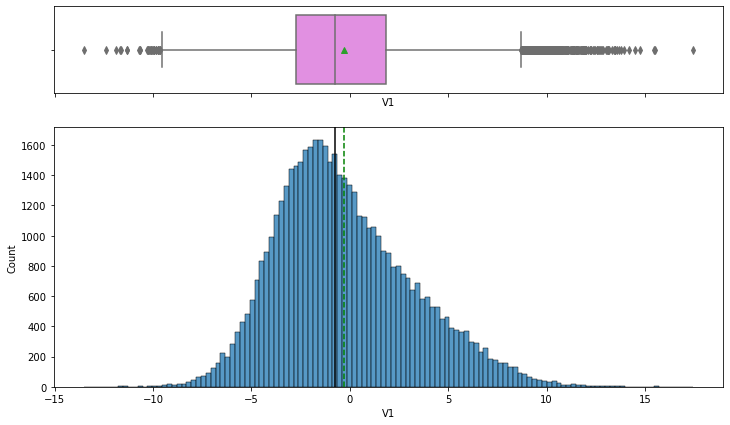

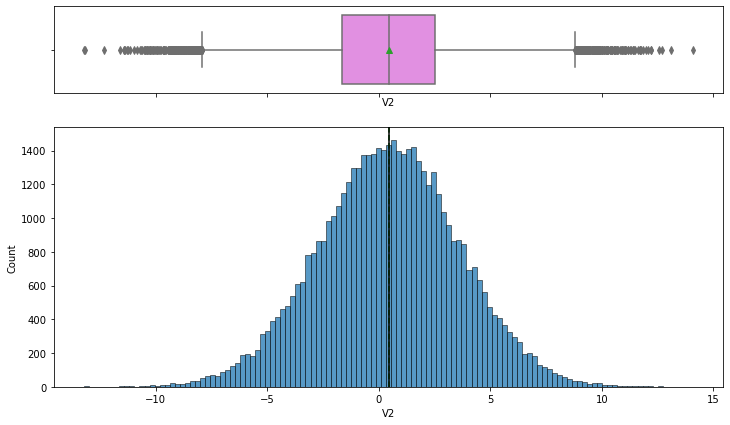

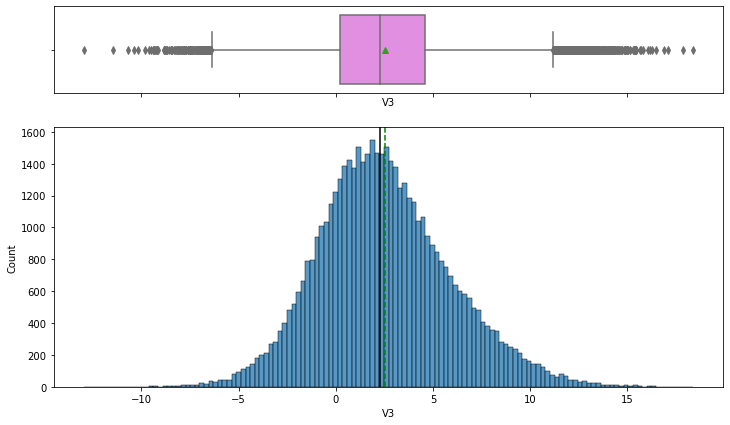

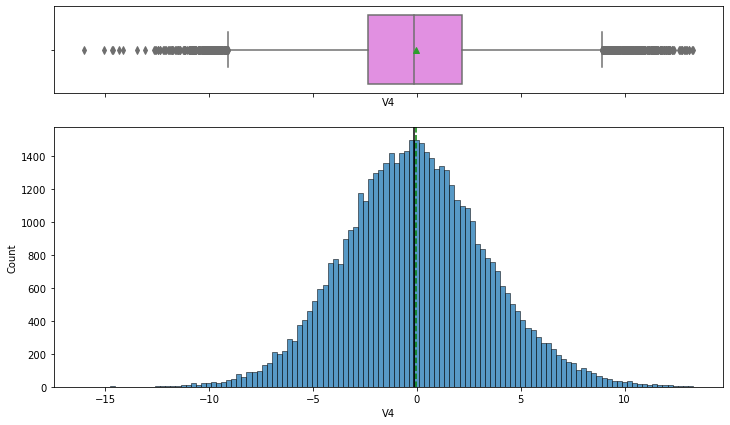

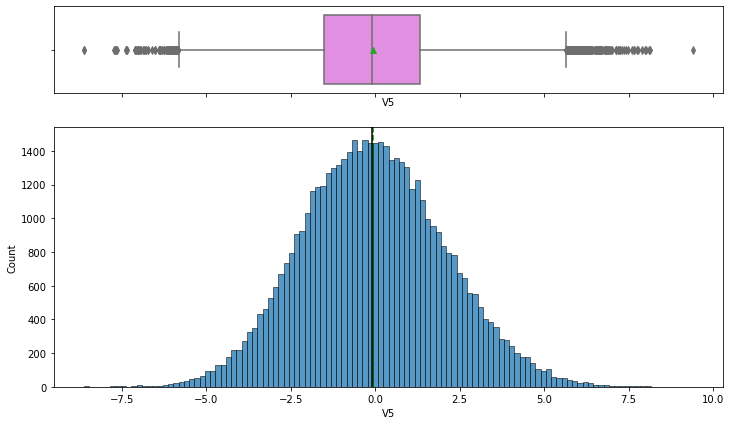

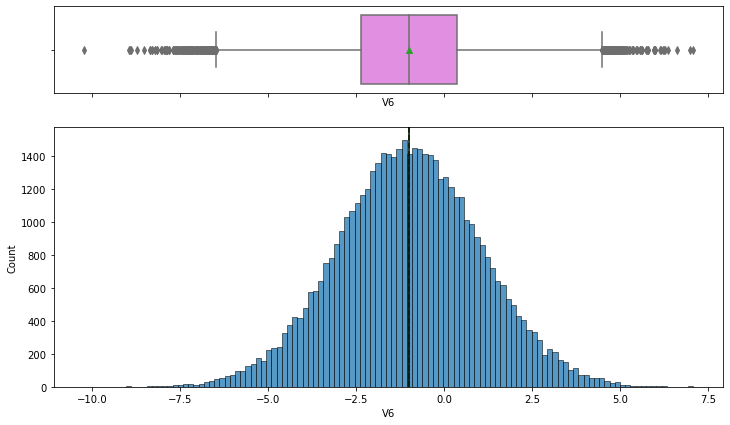

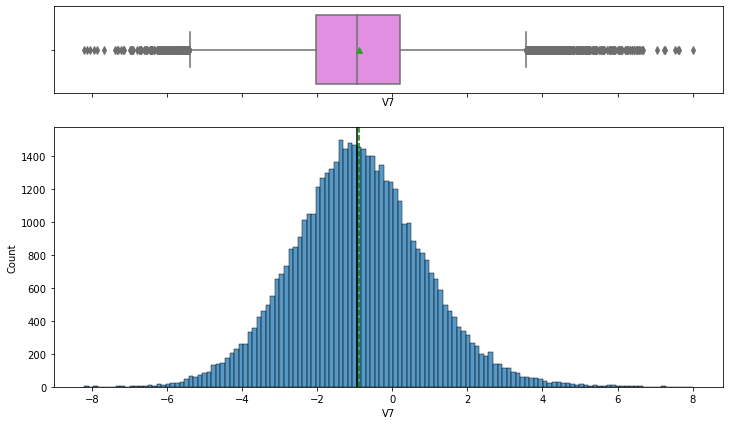

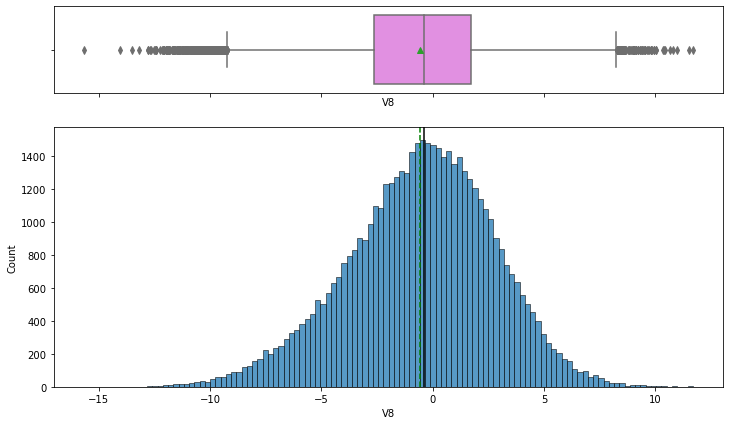

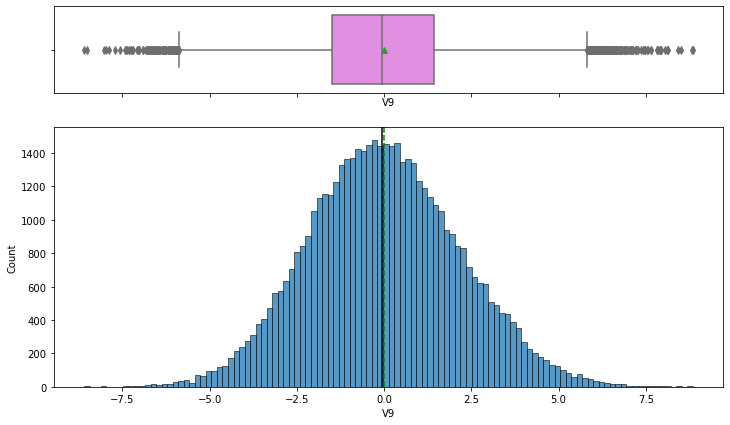

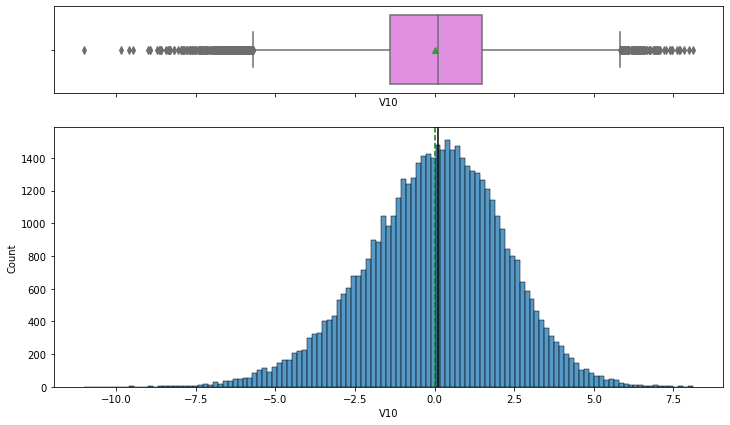

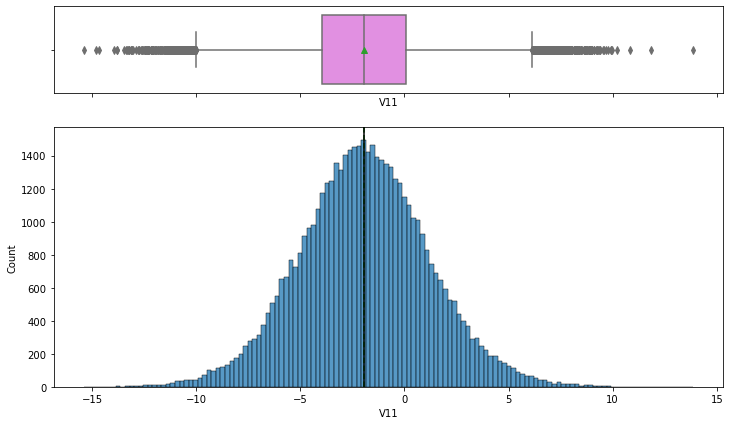

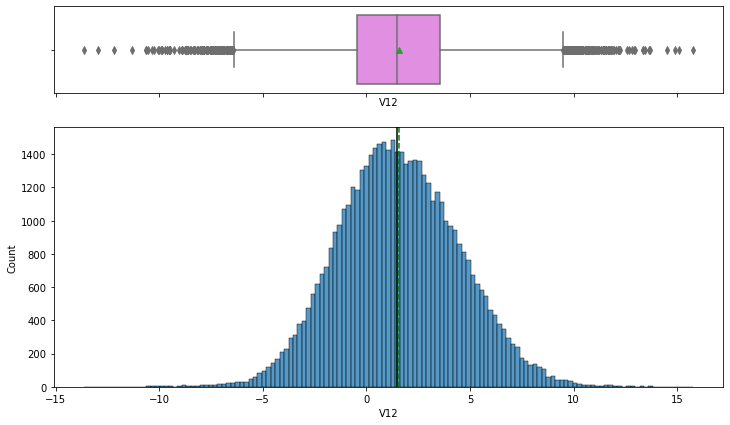

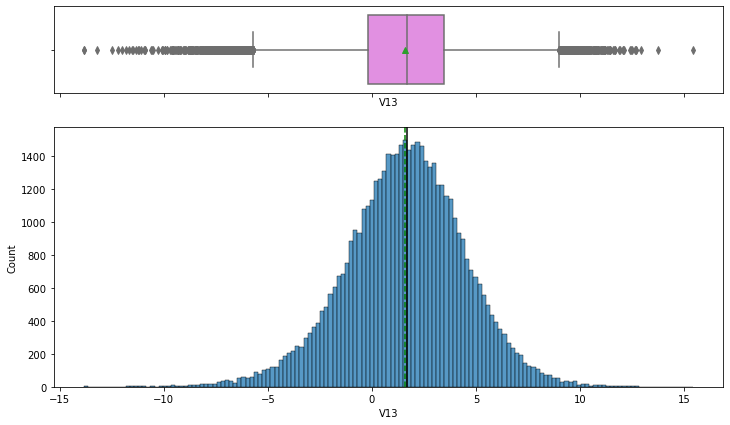

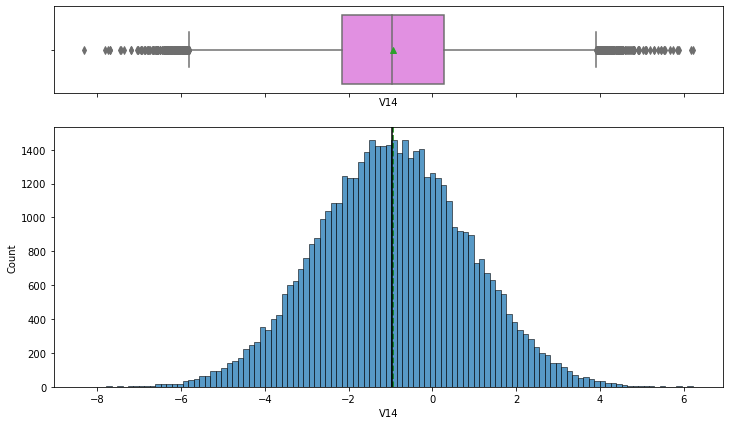

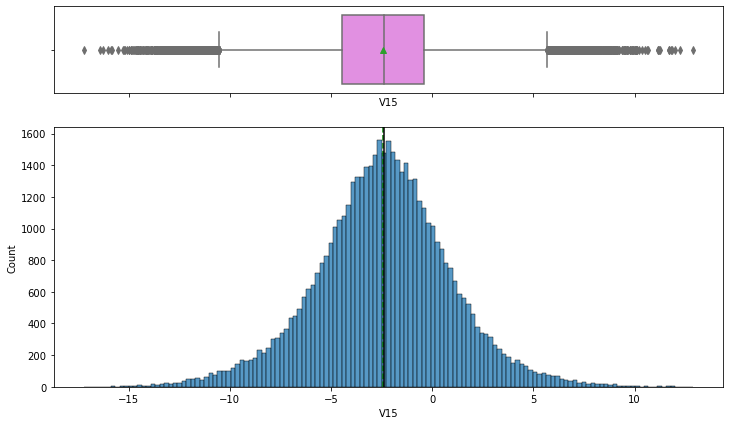

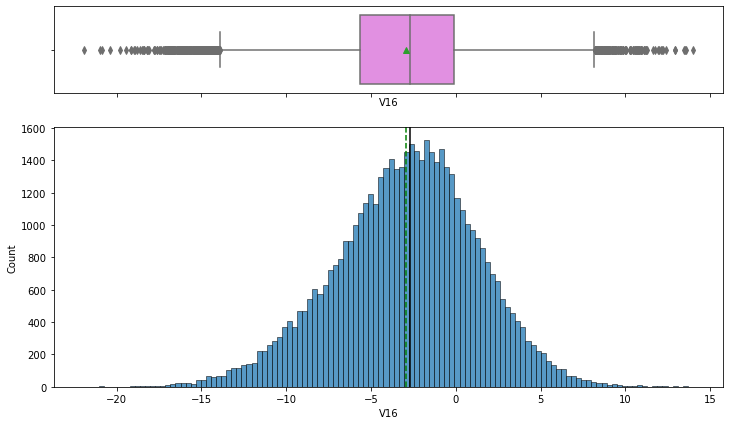

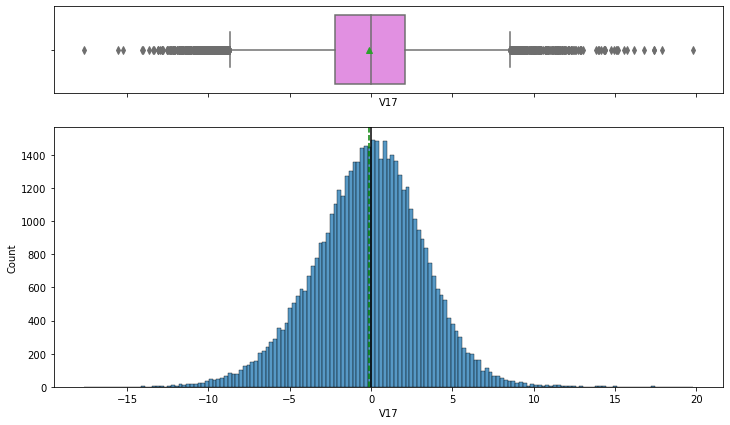

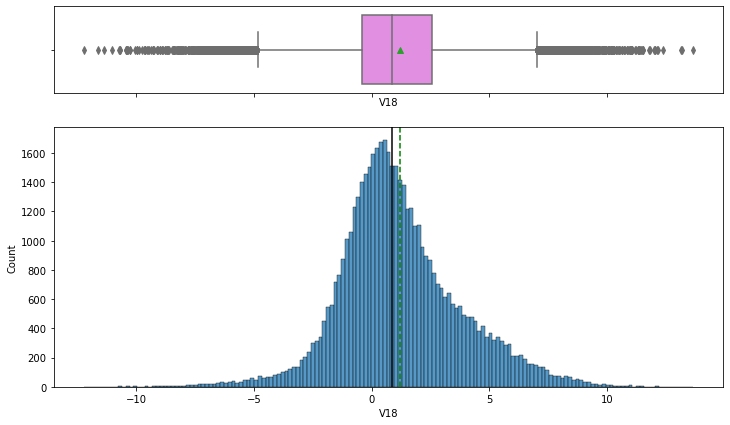

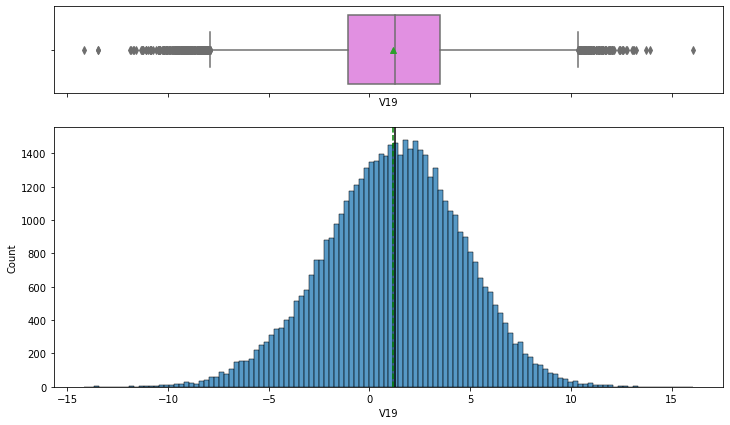

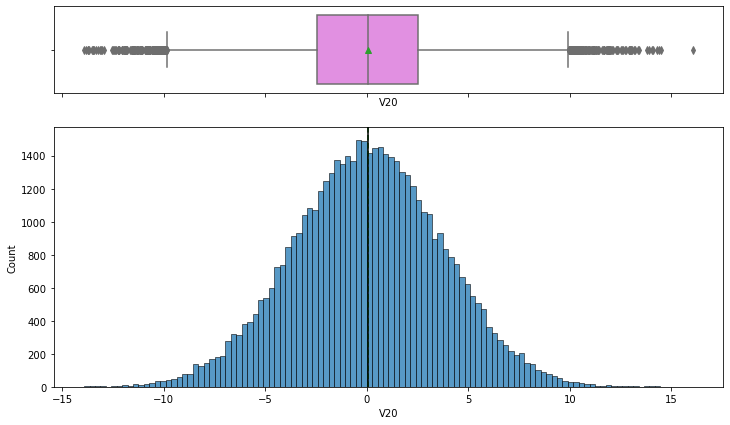

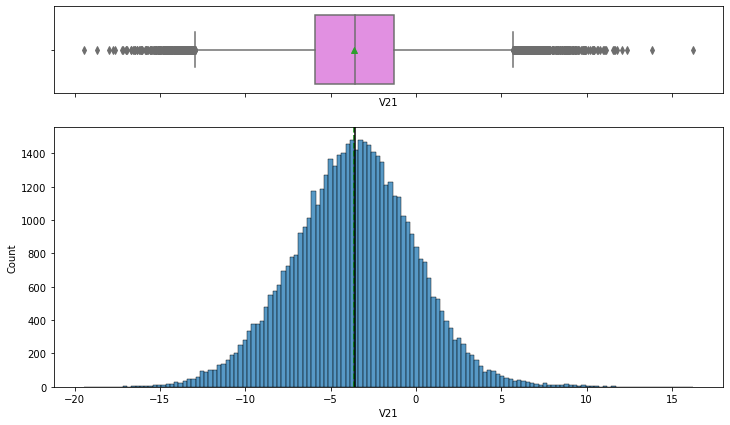

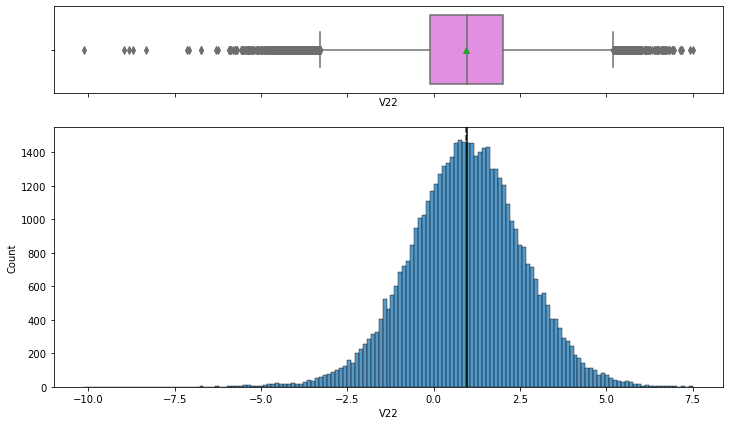

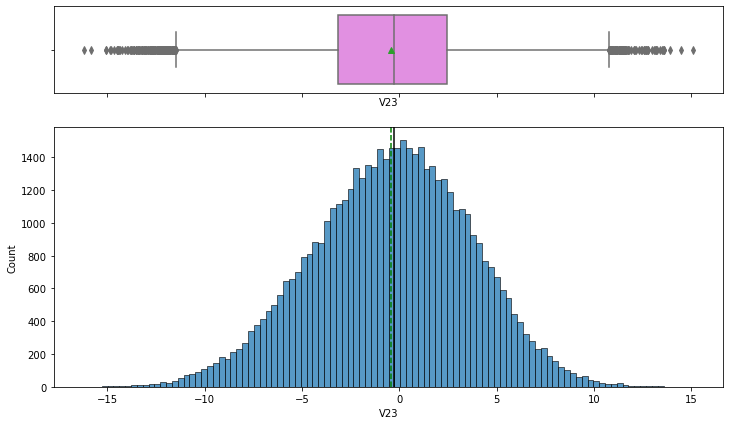

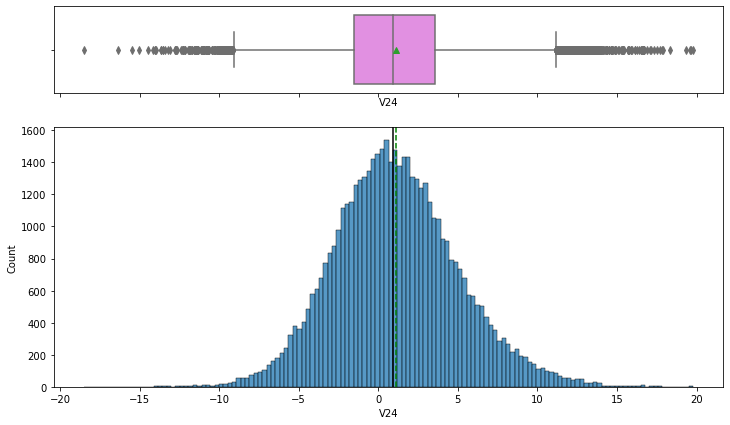

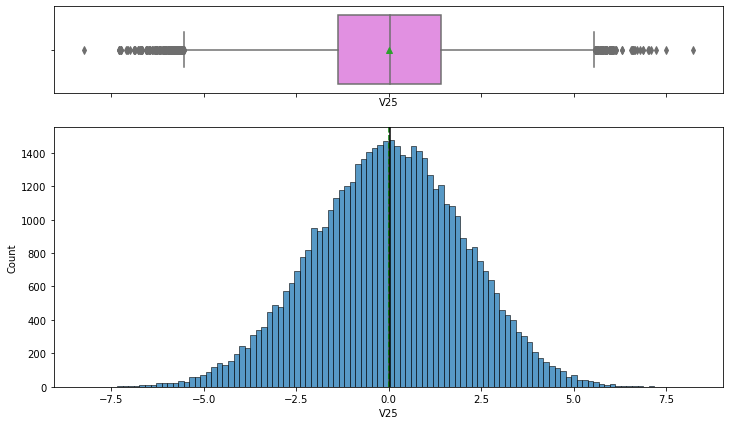

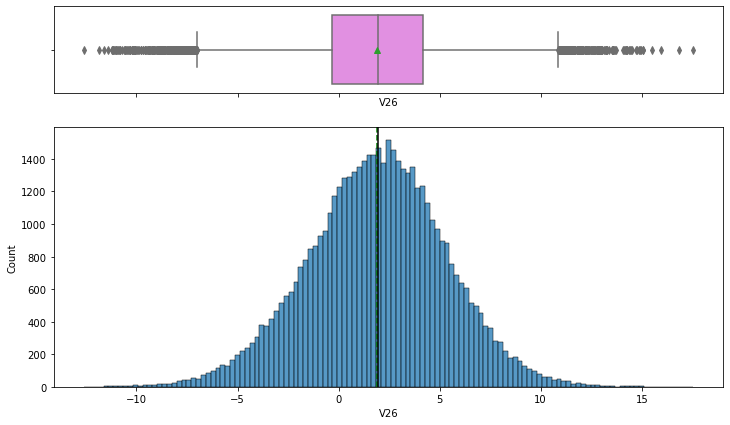

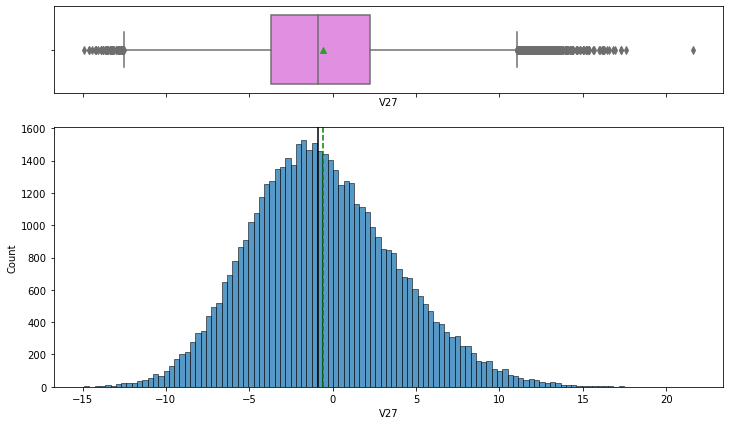

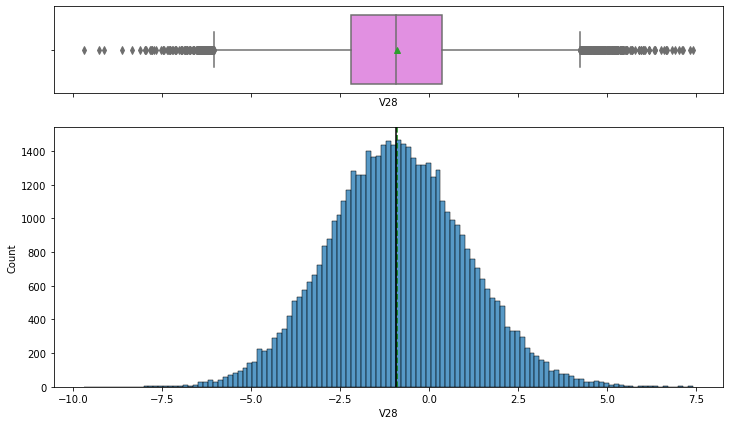

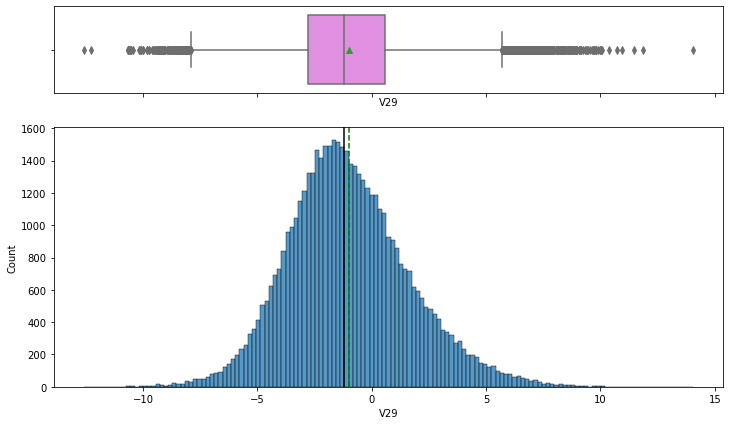

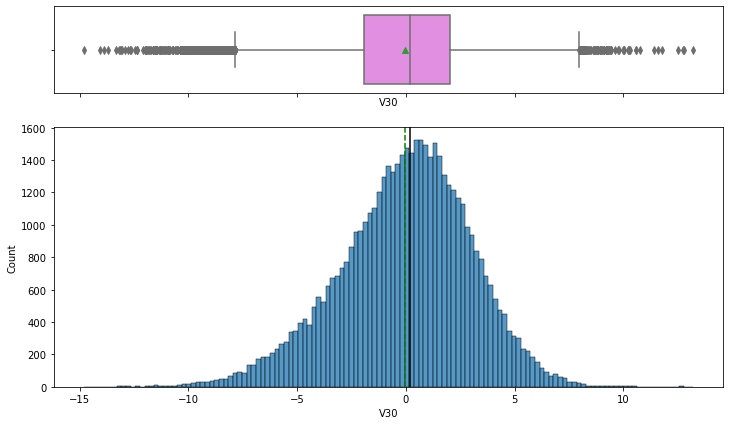

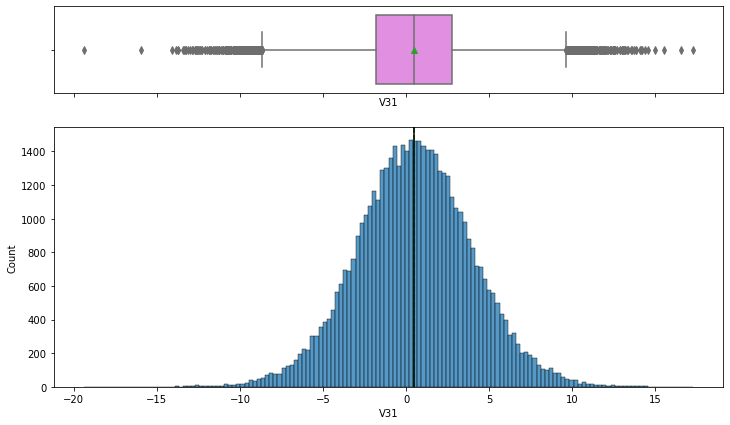

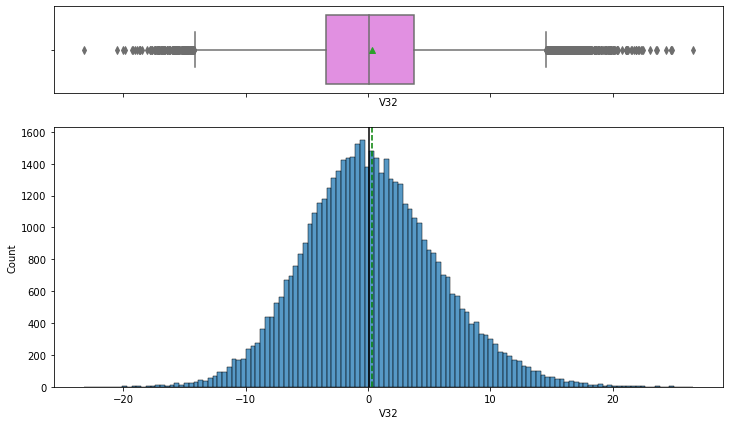

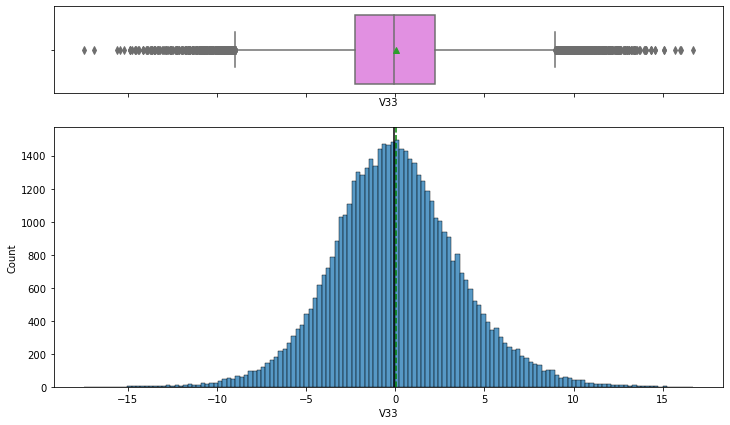

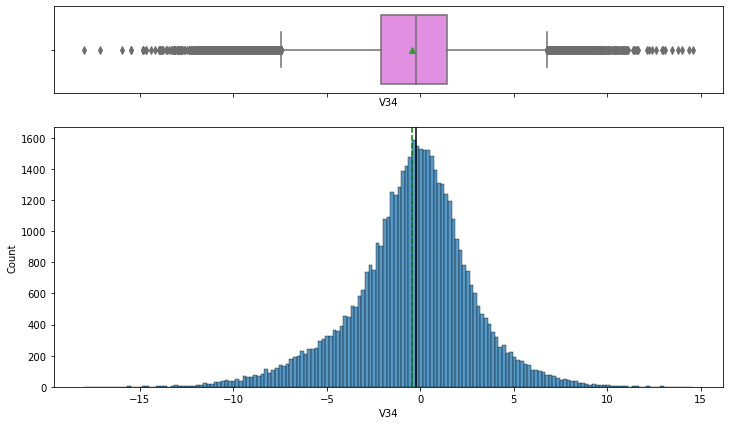

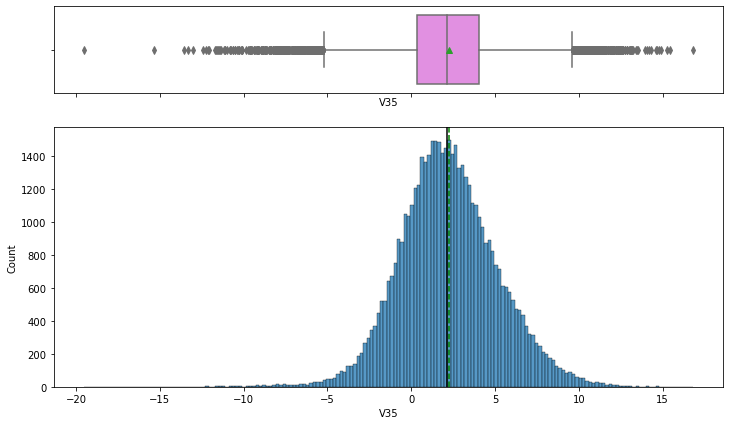

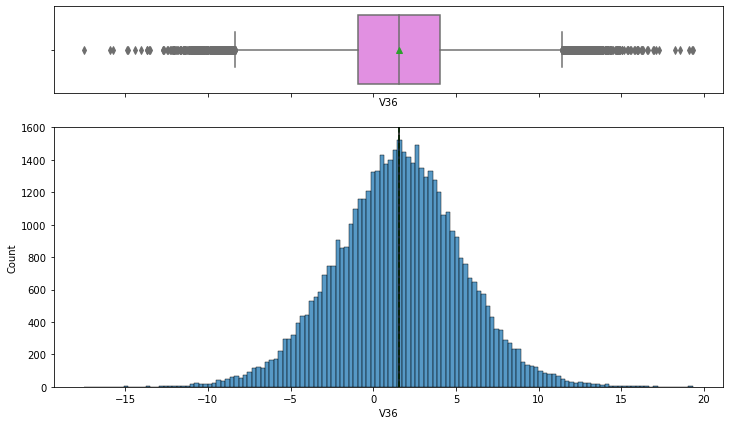

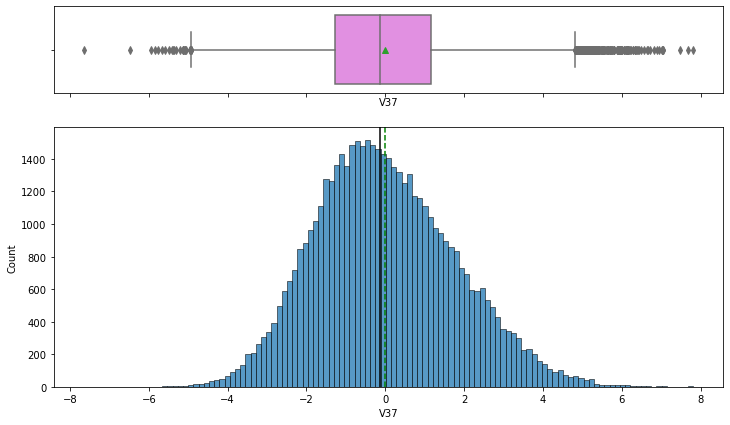

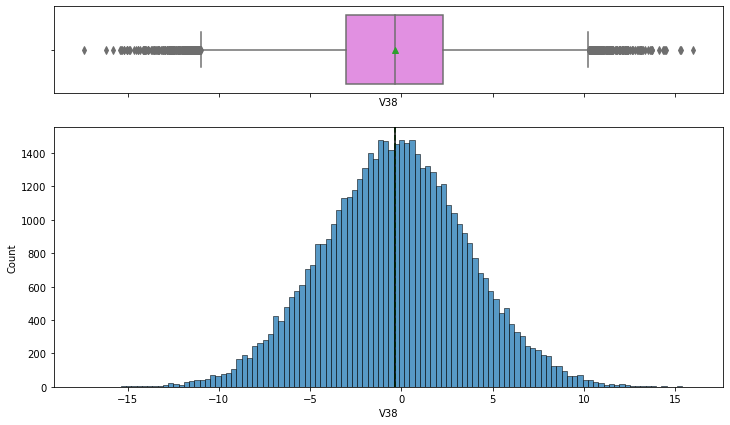

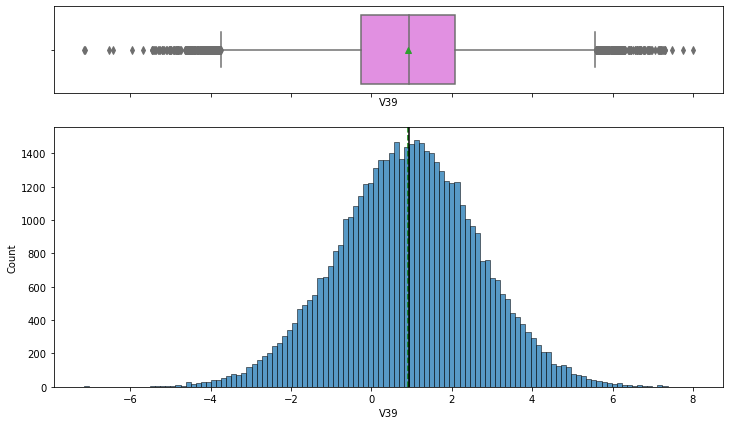

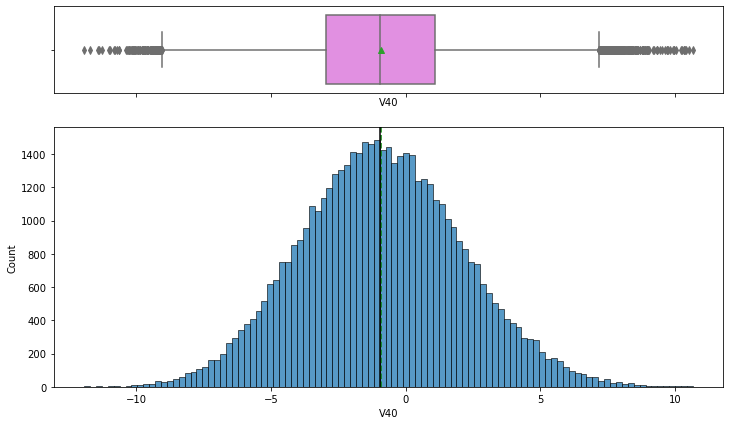

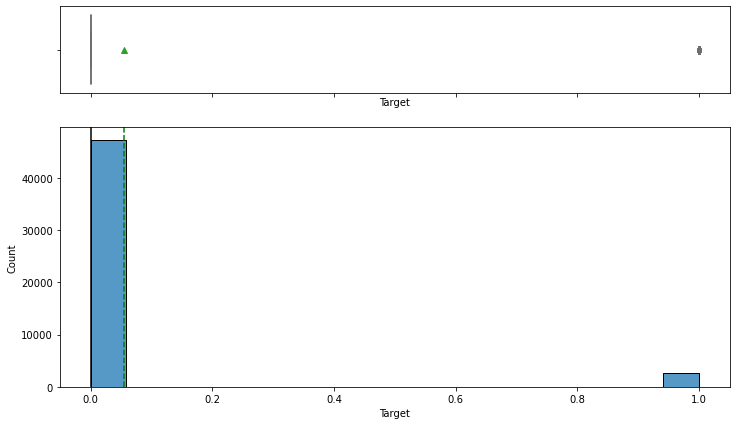

<IPython.core.display.Javascript object>

In [53]:
for feature in df.columns:
    histogram_boxplot(
        df, feature, figsize=(12, 7), kde=False, bins=None
    )  ## Please change the dataframe name as you define while reading the data

# Observation of univariate analysis and outliers

- The imbalance of the target variable is clearly visible
- As expected with ciphered data, all of the variables appear to be normalized with bell-shaped curves
    - No transformations are needed
- `V1`, `V29`, `V18`, and `V37` look slightly right-skewed
- `V8` and `V30` look slightly left-skewed
- Even though the boxplots display outliers in all the featuers, we will not treat them as they represent actual data

## Data Pre-processing

In [57]:
# Divide data into X and y

X = train.drop(["Target"], axis=1)
y = train["Target"]

X_test = test.drop(["Target"], axis=1)
y_test = test["Target"]

<IPython.core.display.Javascript object>

In [59]:
# Split the training data into training and validation datasets

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=1, stratify=y
)

# Check the shape of all 3 datasets
print(X_train.shape, X_val.shape, X_test.shape)

(30000, 40) (10000, 40) (10000, 40)


<IPython.core.display.Javascript object>

In [60]:
# Impute the median for missing values

# We use .fit_transform() on the training set to find the median (on JUST the training set)
# We then use .transform() to apply that same median value to the validation and test sets
# This is to prevent data leakage

imputer = SimpleImputer(strategy="median")

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

X_val = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns)

X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

<IPython.core.display.Javascript object>

In [69]:
# Verify missing values have been imputed

print("Training nulls: ", X_train.isnull().any(axis=1).sum())
print("Validation nulls: ", X_val.isnull().any(axis=1).sum())
print("Testing nulls: ", X_test.isnull().any(axis=1).sum())


Training nulls:  0
Validation nulls:  0
Testing nulls:  0


<IPython.core.display.Javascript object>

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

### Which metric to optimize?

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [70]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [71]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [72]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

<IPython.core.display.Javascript object>

### Model Building with original data

Sample Decision Tree model building with original data 

In [73]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

dtree: 0.7335365853658538
Logistic regression: 0.48292682926829267
Bagging: 0.7347560975609755
Random forest: 0.7621951219512195
GBM: 0.7170731707317073
Adaboost: 0.6164634146341463
Xgboost: 0.8158536585365853

Validation Performance:

dtree: 0.7477148080438757
Logistic regression: 0.4625228519195612
Bagging: 0.7349177330895795
Random forest: 0.7659963436928702
GBM: 0.7148080438756855
Adaboost: 0.6142595978062158
Xgboost: 0.8263254113345521


<IPython.core.display.Javascript object>

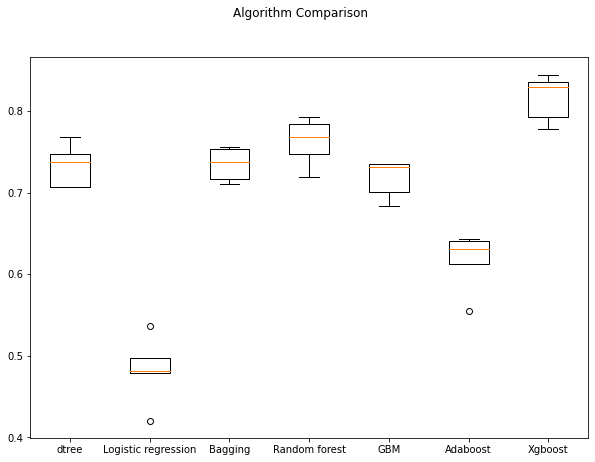

<IPython.core.display.Javascript object>

In [87]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

# Observation of Recall Scores on Default Models

- We can see that the XGBoost is giving the highest cross-validated recall (.816) followed by Random Forest (.762)
- The boxplot shows that the cross-validated XGBoost performance is consistently high and the recall score on the validation set is just as good (.826)

### Model Building with Oversampled data


In [78]:
print("Before OverSampling, counts of label '1' or 'Failure': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0' or 'No Failure': {}".format(sum(y_train == 0)))
print("Before OverSampling, the original shape of X_train: {}".format(X_train.shape))
print()

# Synthetic Minority Over Sampling Technique (SMOTE)
# This function selects a random observation in the minority class, then creates a synthetic,
# random observation between it and its 5 nearest neighbors

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_over == 0)))
print("After OverSampling, the new shape of X_train: {}".format(X_train_over.shape))


Before OverSampling, counts of label '1' or 'Failure': 1640
Before OverSampling, counts of label '0' or 'No Failure': 28360
Before OverSampling, the original shape of X_train: (30000, 40)

After OverSampling, counts of label '1': 28360
After OverSampling, counts of label '0': 28360
After OverSampling, the new shape of X_train: (56720, 40)


<IPython.core.display.Javascript object>

In [79]:
# Create 7 default models using oversampled data and save cross-validated recall scores to results2

results2 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost with OverSampled Dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results2.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance on OverSampled Dataset:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost with OverSampled Dataset:

dtree: 0.9722143864598026
Logistic regression: 0.8754583921015515
Bagging: 0.9730606488011284
Random forest: 0.9817348377997179
GBM: 0.9148095909732017
Adaboost: 0.8933004231311706
Xgboost: 0.9843794076163611

Validation Performance on OverSampled Dataset:

dtree: 0.8135283363802559
Logistic regression: 0.8391224862888482
Bagging: 0.8354661791590493
Random forest: 0.8683729433272395
GBM: 0.8811700182815356
Adaboost: 0.850091407678245
Xgboost: 0.8793418647166362


<IPython.core.display.Javascript object>

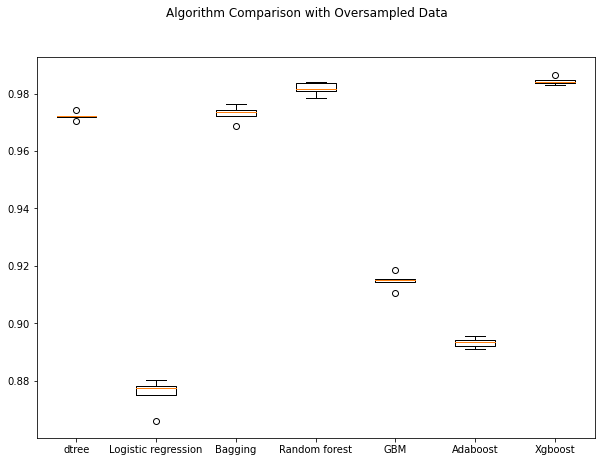

<IPython.core.display.Javascript object>

In [91]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison with Oversampled Data")
ax = fig.add_subplot(111)

plt.boxplot(results2)
ax.set_xticklabels(names)

plt.show()

# Observation of Default Models using Oversampled Data

- We can see that the XGBoost is again giving the highest cross-validated recall (.984 up from .816)
- The next best model is Random Forest giving a cross-validated recall score of .981 (up from .762)
- All of the models performed really well in the cross-validated set (.87 to .98)
- However, the validation scores were lower (.81 to .88), which suggests the models are overfitting.

### Model Building with Undersampled data

In [89]:
print("Before UnderSampling, counts of label '1' or 'Failure': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0' or 'No Failure': {}".format(sum(y_train == 0)))
print("Before UnderSampling, the original shape of X_train: {}".format(X_train.shape))
print()

# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

print("After UnderSampling, counts of label '1': {}".format(sum(y_train_under == 1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_under == 0)))
print("After UnderSampling, the new shape of X_train: {}".format(X_train_under.shape))


Before UnderSampling, counts of label '1' or 'Failure': 1640
Before UnderSampling, counts of label '0' or 'No Failure': 28360
Before UnderSampling, the original shape of X_train: (30000, 40)

After UnderSampling, counts of label '1': 1640
After UnderSampling, counts of label '0': 1640
After UnderSampling, the new shape of X_train: (3280, 40)


<IPython.core.display.Javascript object>

In [90]:
# Create 7 default models using undersampled data and save cross-validated recall scores to results3

results3 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost with UnderSampled Dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_under, y=y_train_under, scoring=scorer, cv=kfold
    )
    results3.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance on UnderSampled Dataset:" "\n")

for name, model in models:
    model.fit(X_train_under, y_train_under)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost with UnderSampled Dataset:

dtree: 0.8591463414634146
Logistic regression: 0.8554878048780488
Bagging: 0.875
Random forest: 0.8981707317073171
GBM: 0.8871951219512194
Adaboost: 0.8725609756097562
Xgboost: 0.8939024390243903

Validation Performance on UnderSampled Dataset:

dtree: 0.8537477148080439
Logistic regression: 0.8464351005484461
Bagging: 0.8628884826325411
Random forest: 0.8848263254113345
GBM: 0.8884826325411335
Adaboost: 0.8647166361974405
Xgboost: 0.9012797074954296


<IPython.core.display.Javascript object>

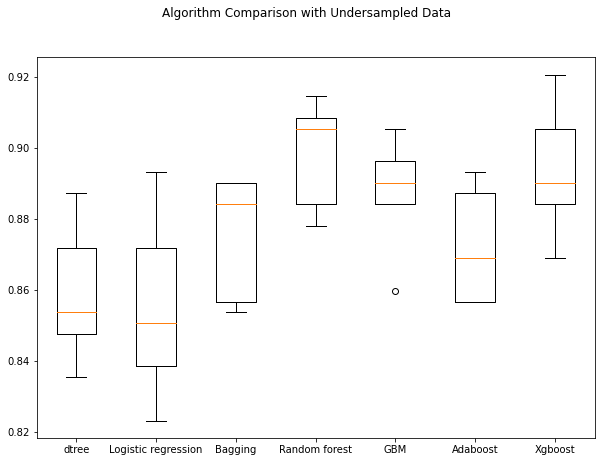

<IPython.core.display.Javascript object>

In [92]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison with Undersampled Data")
ax = fig.add_subplot(111)

plt.boxplot(results3)
ax.set_xticklabels(names)

plt.show()

# Observation of Default Models using UnderSampled Data

- Same as both the original and oversampled sets, XGBoost and Random Forest have the best recall in cross-validation.
- For all the undersampled models, the validation scores are very close to the cross-validated scores, suggesting a reduction in overfitting

# HyperparameterTuning 

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7], 
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6), 
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

# Hyperparameter Tuning - Which Models?

- The 2 best performing models were the XGBoost and Random Forest. They came out on top in all the default models, balanced or imbalanced!
- Therefore, we will tune both XGBoost and Random Forest models using both the oversampled and undersampled datasets.
- The Bagging Classifier on the oversampled data also performed moderately well, so we will tune that one for comparison.

- ### XGBoost on Over + Under
- ### Random Forest on Over + Under
- ### Bagging on Over

#### Let's now tune 5 models...
***

### Hyperparameter tuning method for XGBoost with oversampled data

In [97]:
# defining model
Model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [150, 200, 250],
    "scale_pos_weight": [5, 10],
    "learning_rate": [0.1, 0.2],
    "gamma": [0, 3, 5],
    "subsample": [0.8, 0.9],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9959802538787024:


<IPython.core.display.Javascript object>

In [122]:
# Creating new pipeline with best parameters
tuned_x_over = XGBClassifier(
    random_state=1,
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=250,
    learning_rate=0.1,
    gamma=5,
    eval_metric="logloss",
)

tuned_x_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [123]:
x_over_train_perf = model_performance_classification_sklearn(
    tuned_x_over, X_train_over, y_train_over
)
x_over_train_perf

,Accuracy,Recall,Precision,F1
0,0.994,1.000,0.988,0.994


<IPython.core.display.Javascript object>

In [124]:
x_over_val_perf = model_performance_classification_sklearn(tuned_x_over, X_val, y_val)
x_over_val_perf

,Accuracy,Recall,Precision,F1
0,0.974,0.905,0.702,0.791


<IPython.core.display.Javascript object>

XGBoost tuned w/ oversampled


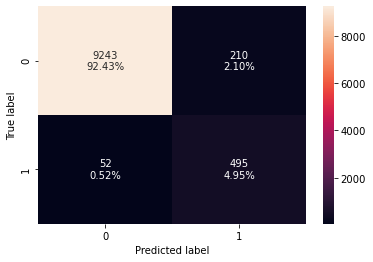

<IPython.core.display.Javascript object>

In [141]:
# creating confusion matrix
print("XGBoost tuned w/ oversampled")
confusion_matrix_sklearn(tuned_x_over, X_val, y_val)

# Observation of Tuned XGBoost on oversampled data

- The default XGBoost on oversampled data gave a cross-validated recall score of .984, and this tuned version gave a better score of .996
- The recall score on the validation set is .905
- False Negatives have been reduced to just 52 in the validation set
- False Positives add up to 210 in the validation set
- The F1 Score on the validation set is .791
- The drop in scores from training to validation sets suggests some overfitting
- This will be a great model, but let's see if any are better...

### Hyperparameter tuning method for XGBoost with undersampled data

In [96]:
# defining model
Model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [150, 200, 250],
    "scale_pos_weight": [5, 10],
    "learning_rate": [0.1, 0.2],
    "gamma": [0, 3, 5],
    "subsample": [0.8, 0.9],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_under, y_train_under)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9189024390243903:


<IPython.core.display.Javascript object>

In [119]:
# Creating new pipeline with best parameters
tuned_x_under = XGBClassifier(
    random_state=1,
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=200,
    learning_rate=0.1,
    gamma=5,
    eval_metric="logloss",
)

tuned_x_under.fit(X_train_under, y_train_under)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [120]:
x_under_train_perf = model_performance_classification_sklearn(
    tuned_x_under, X_train_under, y_train_under
)
x_under_train_perf

,Accuracy,Recall,Precision,F1
0,0.996,1.000,0.992,0.996


<IPython.core.display.Javascript object>

In [121]:
x_under_val_perf = model_performance_classification_sklearn(tuned_x_under, X_val, y_val)
x_under_val_perf

,Accuracy,Recall,Precision,F1
0,0.904,0.918,0.354,0.511


<IPython.core.display.Javascript object>

XGBoost tuned w/ undersampled


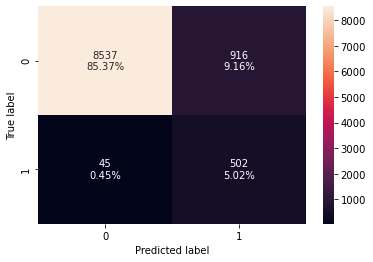

<IPython.core.display.Javascript object>

In [142]:
# creating confusion matrix
print("XGBoost tuned w/ undersampled")
confusion_matrix_sklearn(tuned_x_under, X_val, y_val)

# Observation of Tuned XGBoost on undersampled data

- The default XGBoost on undersampled data gave a cross-validated recall score of .893, and the tuned version gave a better score of .919
- The number of False Negatives has decreased, but the number of False Positives has increased
- The recall score on the validation set is better, but the F1 Score is worse
- This model is still pretty good but the drop in scores from training to validation suggests overfitting

### Hyperparameter tuning method for Random Forest with oversampled data


In [98]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { 
    "n_estimators": [200,250,300], 
    "min_samples_leaf": np.arange(1, 4), 
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'], 
    "max_samples": np.arange(0.4, 0.7, 0.1) 
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9780324400564175:


<IPython.core.display.Javascript object>

In [112]:
# Creating new pipeline with best parameters
tuned_rf_over = RandomForestClassifier(
    random_state=1,
    n_estimators=250,
    min_samples_leaf=1,
    max_samples=0.6,
    max_features="sqrt",
)

tuned_rf_over.fit(X_train_over, y_train_over)

RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=250,
                       random_state=1)

<IPython.core.display.Javascript object>

In [113]:
rf_over_train_perf = model_performance_classification_sklearn(
    tuned_rf_over, X_train_over, y_train_over
)
rf_over_train_perf

,Accuracy,Recall,Precision,F1
0,1.000,0.999,1.000,1.000


<IPython.core.display.Javascript object>

In [114]:
rf_over_val_perf = model_performance_classification_sklearn(tuned_rf_over, X_val, y_val)
rf_over_val_perf

,Accuracy,Recall,Precision,F1
0,0.990,0.872,0.948,0.909


<IPython.core.display.Javascript object>

Random Forest tuned w/ oversampled


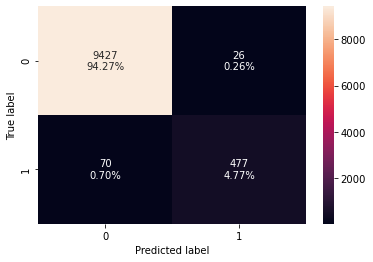

<IPython.core.display.Javascript object>

In [143]:
# creating confusion matrix
print("Random Forest tuned w/ oversampled")
confusion_matrix_sklearn(tuned_rf_over, X_val, y_val)

# Observation of Tuned Random Forest on Oversampled Data

- The tuning og this Random Forest model improved the cross-validated recall score from .982 to .978
- The recall score on the validation set is slightly less than the last two models, but the F1 Score is higher at .909
- The False Negatives are higher (hence the lower recall score), but the False Positives are much lower.
- The difference in scores from training to validation is the least we've seen so far, so there is less of an issue of overfitting.

### Hyperparameter tuning method for Random Forest with undersampled data


In [99]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200, 250, 300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1), "sqrt"],
    "max_samples": np.arange(0.4, 0.7, 0.1),
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_under, y_train_under)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 200, 'min_samples_leaf': 2, 'max_samples': 0.4, 'max_features': 'sqrt'} with CV score=0.899390243902439:


<IPython.core.display.Javascript object>

In [109]:
# Creating new pipeline with best parameters
tuned_rf_under = RandomForestClassifier(
    random_state=1,
    n_estimators=200,
    min_samples_leaf=2,
    max_samples=0.4,
    max_features="sqrt",
)

tuned_rf_under.fit(X_train_under, y_train_under)

RandomForestClassifier(max_features='sqrt', max_samples=0.4, min_samples_leaf=2,
                       n_estimators=200, random_state=1)

<IPython.core.display.Javascript object>

In [110]:
rf_under_train_perf = model_performance_classification_sklearn(
    tuned_rf_under, X_train_under, y_train_under
)
rf_under_train_perf

,Accuracy,Recall,Precision,F1
0,0.955,0.921,0.988,0.954


<IPython.core.display.Javascript object>

In [115]:
rf_under_val_perf = model_performance_classification_sklearn(
    tuned_rf_under, X_val, y_val
)
rf_under_val_perf

,Accuracy,Recall,Precision,F1
0,0.960,0.890,0.590,0.710


<IPython.core.display.Javascript object>

Random Forest tuned w/ undersampled


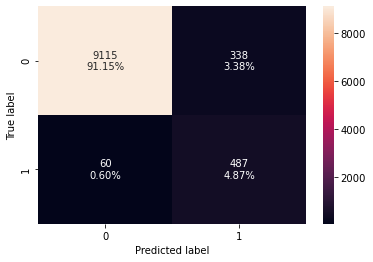

<IPython.core.display.Javascript object>

In [144]:
# creating confusion matrix
print("Random Forest tuned w/ undersampled")
confusion_matrix_sklearn(tuned_rf_under, X_val, y_val)

# Observation of Tuned Random Forest on Undersampled Data

- The tuning improved the cross-validation recall from .898 to .899 but it's not as good as the previous Random Forest
- The recall score on the validation is .89 and the f1 score is .71
- The training and validation scores are far enough apart to suggest overfitting

### Hyperparameter Tuning method for Bagging Classifier with oversampled data

In [100]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_samples": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9],
    "n_estimators": [30, 50, 70],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 70, 'max_samples': 1, 'max_features': 0.8} with CV score=1.0:


<IPython.core.display.Javascript object>

In [125]:
# Creating new pipeline with best parameters
tuned_bag_over = BaggingClassifier(
    max_features=0.8, random_state=1, max_samples=1, n_estimators=70
)

tuned_bag_over.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.8, max_samples=1, n_estimators=70,
                  random_state=1)

<IPython.core.display.Javascript object>

In [126]:
bag_over_train_perf = model_performance_classification_sklearn(
    tuned_bag_over, X_train_over, y_train_over
)
bag_over_train_perf

,Accuracy,Recall,Precision,F1
0,0.500,1.000,0.500,0.667


<IPython.core.display.Javascript object>

In [127]:
bag_over_val_perf = model_performance_classification_sklearn(
    tuned_bag_over, X_val, y_val
)
bag_over_val_perf

,Accuracy,Recall,Precision,F1
0,0.055,1.000,0.055,0.104


<IPython.core.display.Javascript object>

Bagging tuned w/ oversampled


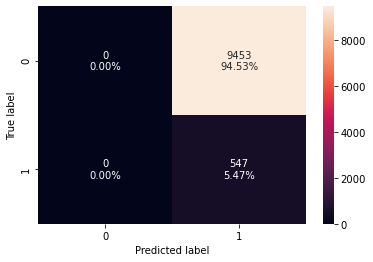

<IPython.core.display.Javascript object>

In [145]:
# creating confusion matrix
print("Bagging tuned w/ oversampled")
confusion_matrix_sklearn(tuned_bag_over, X_val, y_val)

# Observation of Tuned Bagging Classifier on Oversampled Data

- The tuning improved the cross-validation recall score from .973 to 1.0
- The model correctly labels ALL the Failures in both the training and validation sets, reducing False Negatives to 0
- However, the f1 scores are the worst of all the tuned models we've seen (not a single True Negative in the confusion matrix)

## Model performance comparison and choosing the final model

In [131]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        bag_over_train_perf.T,
        rf_over_train_perf.T,
        rf_under_train_perf.T,
        x_over_train_perf.T,
        x_under_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Bagging tuned w/ oversampled",
    "Random Forest tuned w/ oversampled",
    "Random Forest tuned w/ undersampled",
    "XGBoost tuned w/ oversampled",
    "XGBoost tuned w/ undersampled",
]

<IPython.core.display.Javascript object>

In [133]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        bag_over_val_perf.T,
        rf_over_val_perf.T,
        rf_under_val_perf.T,
        x_over_val_perf.T,
        x_under_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Bagging tuned w/ oversampled",
    "Random Forest tuned w/ oversampled",
    "Random Forest tuned w/ undersampled",
    "XGBoost tuned w/ oversampled",
    "XGBoost tuned w/ undersampled",
]

<IPython.core.display.Javascript object>

In [134]:
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Bagging tuned w/ oversampled,Random Forest tuned w/ oversampled,Random Forest tuned w/ undersampled,XGBoost tuned w/ oversampled,XGBoost tuned w/ undersampled
Accuracy,0.500,1.000,0.955,0.994,0.996
Recall,1.000,0.999,0.921,1.000,1.000
Precision,0.500,1.000,0.988,0.988,0.992
F1,0.667,1.000,0.954,0.994,0.996


<IPython.core.display.Javascript object>

In [135]:
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Bagging tuned w/ oversampled,Random Forest tuned w/ oversampled,Random Forest tuned w/ undersampled,XGBoost tuned w/ oversampled,XGBoost tuned w/ undersampled
Accuracy,0.055,0.990,0.960,0.974,0.904
Recall,1.000,0.872,0.890,0.905,0.918
Precision,0.055,0.948,0.590,0.702,0.354
F1,0.104,0.909,0.710,0.791,0.511


<IPython.core.display.Javascript object>

# Observation of Model Performance Comparison
- The models with the 2 highest F1 Scores were the Random Forest w/ oversampled and XGBoost w/ oversampled, which means these models were the best at reducing both false positives and false negatives.
- The models with the 2 highest Recall scores were the XGBoost w/ oversampled and XGBoost w/ undersampled, which means they are the best at reducing false negatives, and thus will detect failures more accurately than the other models


# But, what's the cost?
Let's remember the costs involved:
- `Replacement cost = $40,000`
- `Repair cost = $15,000`
- `Inspection cost = $5,000`

### Let's analyze maintenance costs associated with our 2 best models: XGBoost and Random Forest

Let's look again at the confusion matrix for the XGBoost w/ oversampled on validation dataset:

XGBoost tuned w/ oversampled


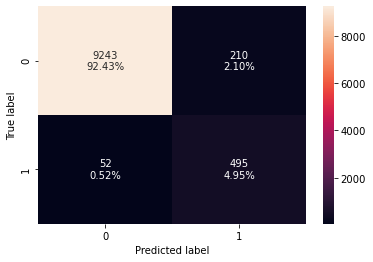

<IPython.core.display.Javascript object>

In [155]:
# creating confusion matrix
print("XGBoost tuned w/ oversampled")
confusion_matrix_sklearn(tuned_x_over, X_val, y_val)

In [171]:
# Initialize the costs in thousands
replace = 40
repair = 15
inspect = 5

# In this model on the validation set, there were 9243 observations that were
# correctly predicted to have no failure, therefore, no inspection necessitated, and no associated costs
TN = 0

# There were 495 observations that were correctly predicted as failures that necessitated inspection and repair
TP = 495 * (inspect + repair)

# There were 210 observations that were incorrectly predicted as failures,
# thus they incurred inspection costs, but not repair costs
FP = 210 * inspect

# Finally, there were 52 observations that were incorrectly predicted as non-failures,
# thus they were not inspected and ended up breaking, incuring major replacement costs
FN = 52 * replace

# Grand total of costs:
print("Cost (in thousands) associated with XGBoost model tuned w/ oversampled:")
TN + TP + FP + FN

Cost (in thousands) associated with XGBoost model tuned w/ oversampled:


13030

<IPython.core.display.Javascript object>

Random Forest tuned w/ oversampled


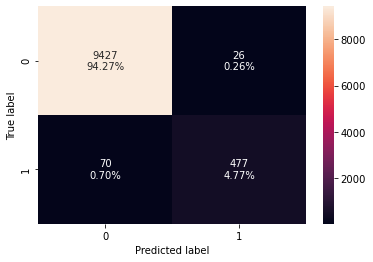

<IPython.core.display.Javascript object>

In [198]:
# creating confusion matrix for Random Forest

print("Random Forest tuned w/ oversampled")
confusion_matrix_sklearn(tuned_rf_over, X_val, y_val)

In [172]:
# Now let's repeat the cost analysis steps with the confusion matrix of the Random Forest tuned w/ oversampled

TN = 0
TP = 477 * (inspect + repair)
FP = 26 * inspect
FN = 70 * replace

print("Cost (in thousands) associated with Random Forest model tuned w/ oversampled:")
TN + TP + FP + FN

Cost (in thousands) associated with Random Forest model tuned w/ oversampled:


12470

<IPython.core.display.Javascript object>

In [161]:
13030 - 12470

560

<IPython.core.display.Javascript object>

### In this estimate, the Random Forest saved the company $560K more than the XGBoost. 

However, this is assuming that every single observations of the sensors is treated independently. It's probably more realistic that an inspection is only necessitated when there are many observations marked as failures for a single wind turbine unit.

It's also extremely important to remember that some sensors are more indicative of failure than others, so having a model that can detect the most important features is just as critical as knowing the F1 and Recall scores.

## Let's compare the important features of the two best models.

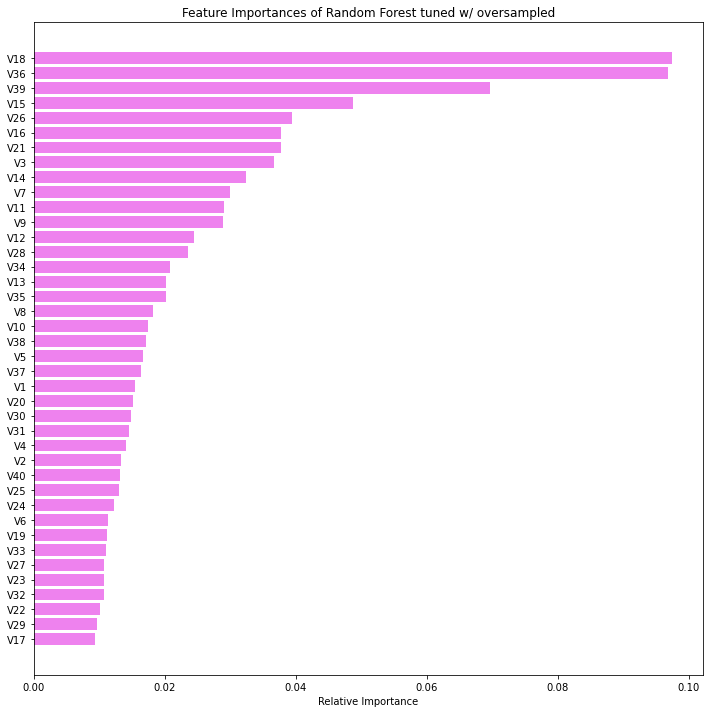

<IPython.core.display.Javascript object>

In [163]:
feature_names = X_train.columns
importances = tuned_rf_over.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances of Random Forest tuned w/ oversampled")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## The top 5 for Random Forest are `V18`, `V36`, `V39`, `V15`, and `V26`

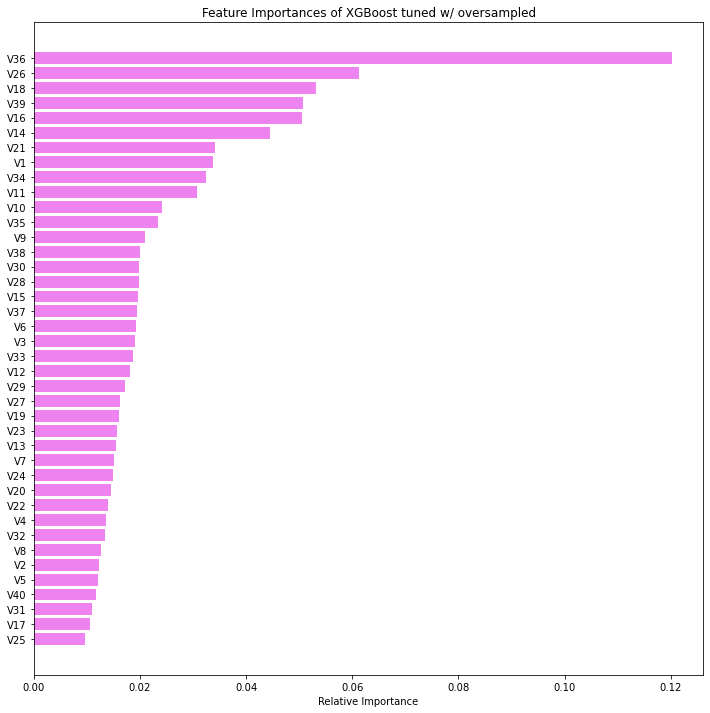

<IPython.core.display.Javascript object>

In [164]:
feature_names = X_train.columns
importances = tuned_x_over.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances of XGBoost tuned w/ oversampled")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## The Top 5 five for XGBoost are `V36`, `V26`, `V18`, `V39`, and `V16`

***

Since `V36` is one of the most important features in both the models, let's look at a histogram of that sensor with the failures and non-failures layered on top of each other, and then let's compare that to a histogram of a sensor with the least importance, such as `V17`.

<AxesSubplot:xlabel='V36', ylabel='Count'>

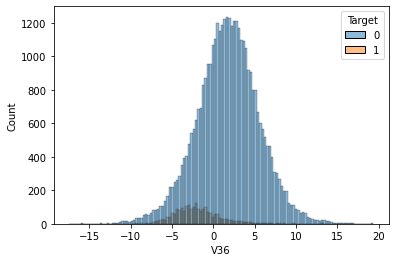

<IPython.core.display.Javascript object>

In [201]:
sns.histplot(data=train, x="V36", hue="Target")

<AxesSubplot:xlabel='V17', ylabel='Count'>

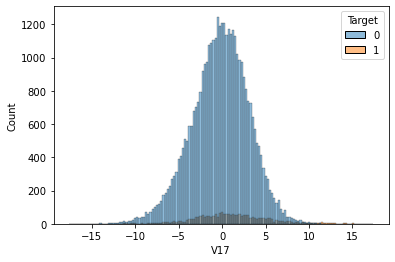

<IPython.core.display.Javascript object>

In [202]:
sns.histplot(data=train, x="V17", hue="Target")

# Observation of Most vs Least Important Features

- The distributions of failures vs non-failures in `V36` are noticably different. The average value for non-failures is above zero, while the average value for failures is below zero.

- The distributions of failures vs non-failures in `V17` are almost indistinguishable. The average value for both are close to zero.

- Hopefully these visuals help to make sense out of the most and least important features.

***
# ⭐⭐⭐Final Model Choice:
# Random Forest Tuned with Oversampled Training Set

- This model may not have the highest recall score, but it excels at reducing both False Positives and False Negatives resulting in the best reduction of maintenance costs.

- The 5 most important features for this model are `V18`, `V36`, `V39`, `V15`, and `V26`


- If replacement costs increase or the maintenance strategy is different from the estimate we used, then the XGBoost model may be better.
***

In [196]:
# Review of validation scores for final model

rf_over_val_perf

,Accuracy,Recall,Precision,F1
0,0.990,0.872,0.948,0.909


<IPython.core.display.Javascript object>

### Test set final performance

In [169]:
# Apply test set to the Random Forest model tuned w/ oversampled

model_performance_classification_sklearn(tuned_rf_over, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.989,0.852,0.947,0.897


<IPython.core.display.Javascript object>

# Observation of Final Model Performance on Test set

- The final model has a robust Recall score of `85.2%` and a remarkable F1 score of `89.7%`
- We are very glad this model translates well from training to production.

## Pipelines to build the final model


In [189]:
Model = Pipeline(
    [
        (
            "Random Forest",
            RandomForestClassifier(
                random_state=1,
                n_estimators=250,
                min_samples_leaf=1,
                max_samples=0.6,
                max_features="sqrt",
            ),
        )
    ]
)

<IPython.core.display.Javascript object>

In [190]:
# Separating target variable and other variables
X1 = train.drop(columns="Target")
Y1 = train["Target"]

X_test1 = test.drop(columns="Target")
y_test1 = test["Target"]

<IPython.core.display.Javascript object>

In [191]:
# treat the missing values in the train set
imputer = SimpleImputer(strategy="median")
X1 = imputer.fit_transform(X1)

# let's treat the missing values in the test set
X_test1 = imputer.transform(X_test1)

<IPython.core.display.Javascript object>

In [192]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_over1, y_over1 = sm.fit_resample(X1, Y1)

<IPython.core.display.Javascript object>

In [193]:
# Fit the model to the oversampled training set
Model.fit(
    X_over1, y_over1
)  

Pipeline(steps=[('Random Forest',
                 RandomForestClassifier(max_features='sqrt', max_samples=0.6,
                                        n_estimators=250, random_state=1))])

<IPython.core.display.Javascript object>

In [194]:
# Find the predictions for the test set
Model.predict(X_test1)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<IPython.core.display.Javascript object>

In [195]:
# Print the accuracy of the model on the test set
Model.score(X_test1, y_test1)

0.9893

<IPython.core.display.Javascript object>

# Business Insights and Conclusions

- The final machine learning model uses a Random Forest and has an accuracy score of `98.93%` and a recall score of `85.2%`
- This model reduces False Negatives at a high rate while also reducing False Positives, which is the best balance for reducing overall maintenance costs.
- This model was selected based on current costs and estimates, so if the maintenance strategy is different from what we used, a different model may be required.
    - To illustrate this point, this Random Forest model is estimated to save the company $560K more than the XGBoost model which had a higher recall score.


- The 8 most important features for this model in order are `V18`, `V36`, `V39`, `V15`, `V26`, `V16`, `V21`, and `V3`
- Company should prioritize monitoring these 8 sensors with closer scrutiny as the model can more accurately predict failure based on these features.
- Company should inspect wind turbines marked as failure to reduce downtime from breakage and enormous replacement costs
- Company can use this model to also reduce the amount of inspections needed overall, thus re-allocating labor and resources to other departments, such as research and development


- Company should research new wind turbine models that are less likely to need repairs
    - The current failure rate is 5.5%, and we believe this can be lowered through innovation
    - Smaller, more efficient turbines with less parts means less repairs and less expensive repair and replacement costs
- Maintaning wind turbines to produce affordable clean energy is a challenge and this model will cut costs by millions of dollars every year

***